In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [4]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
flight_dframe.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [6]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [7]:
flight_dframe.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


/Users/ahmetbektes/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


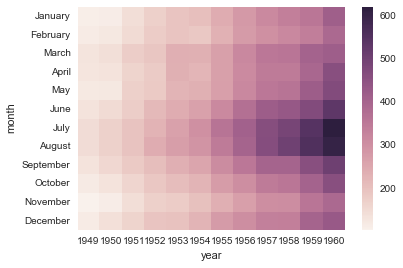

In [8]:
sns.heatmap(flight_dframe)

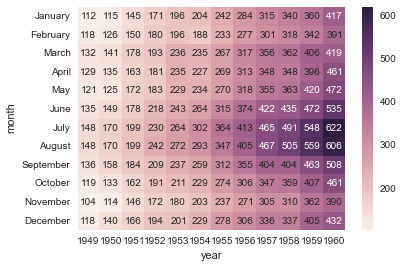

In [10]:
sns.heatmap(flight_dframe,annot=True, fmt='d')

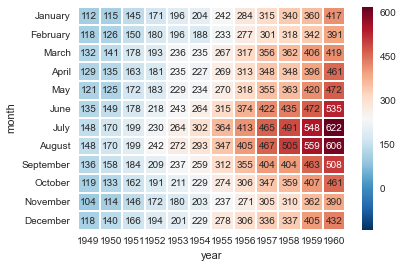

In [12]:
#we changed the center of the data 
sns.heatmap(flight_dframe,annot=True, fmt='d',center=flight_dframe.loc['January',1955], linewidths=.5)

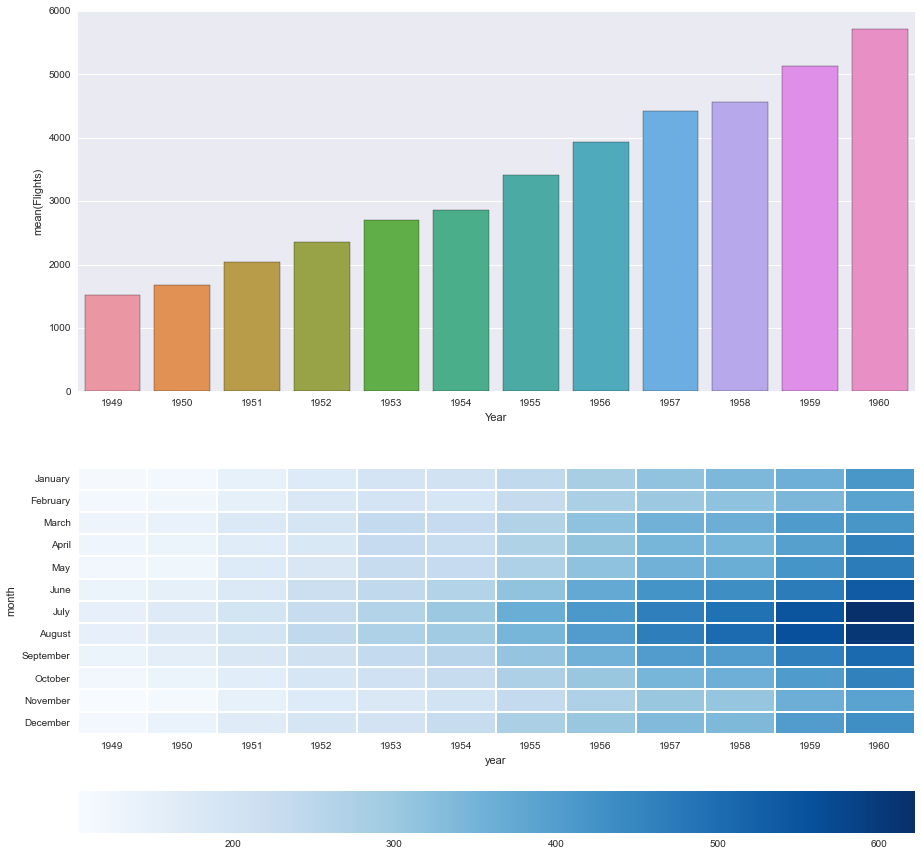

In [20]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1,figsize=(15,15))

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,linewidths=1,cbar_kws={"orientation": "horizontal"})

In [21]:
year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


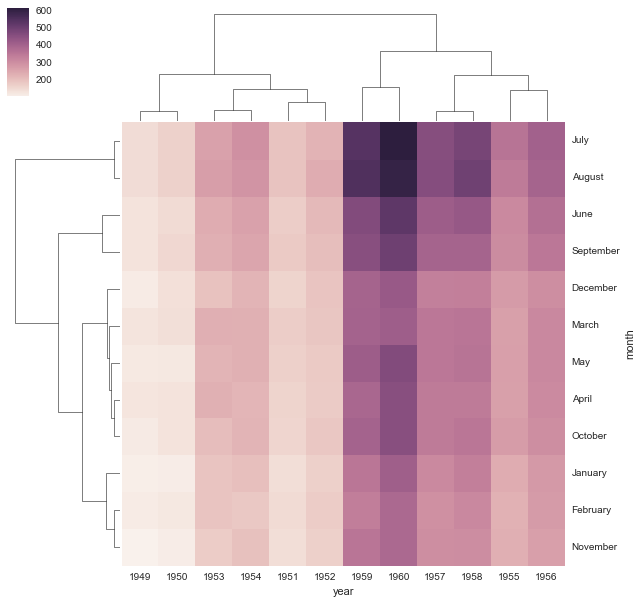

In [22]:
sns.clustermap(flight_dframe)

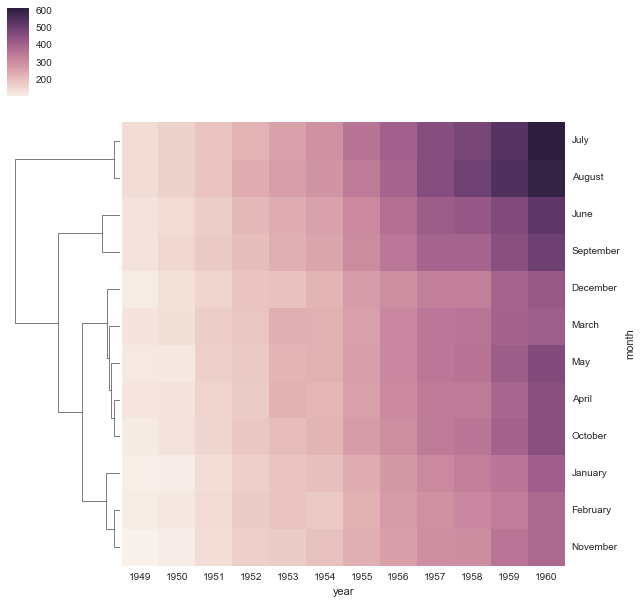

In [23]:
sns.clustermap(flight_dframe,col_cluster=False)

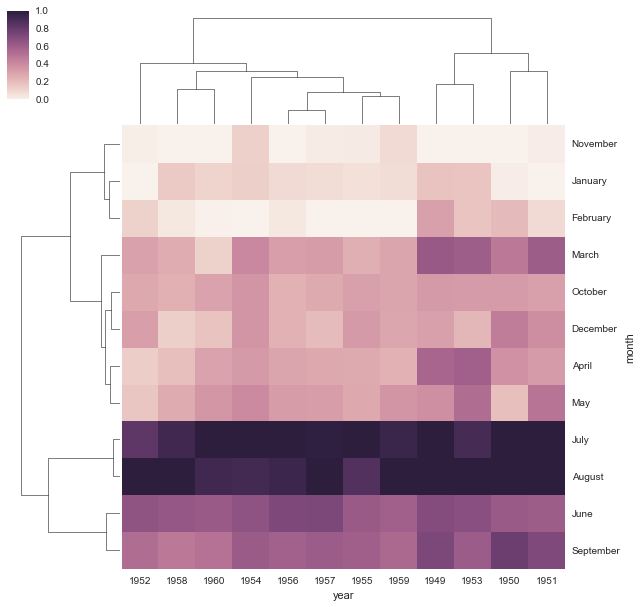

In [24]:
sns.clustermap(flight_dframe,standard_scale=1)

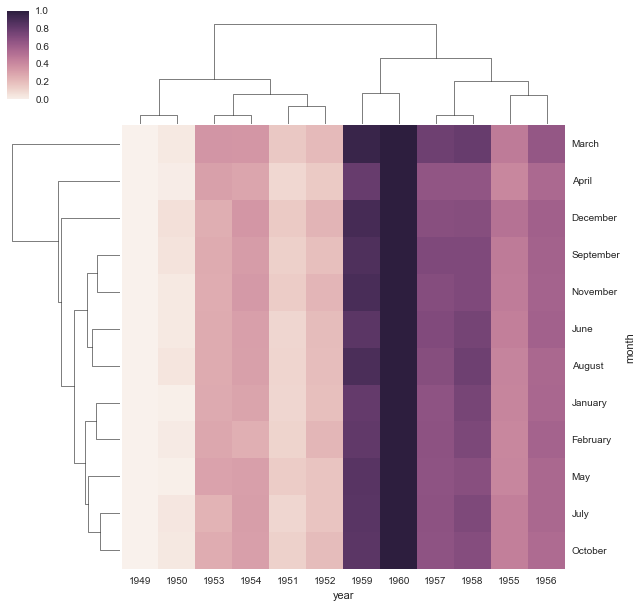

In [25]:
sns.clustermap(flight_dframe,standard_scale=0)

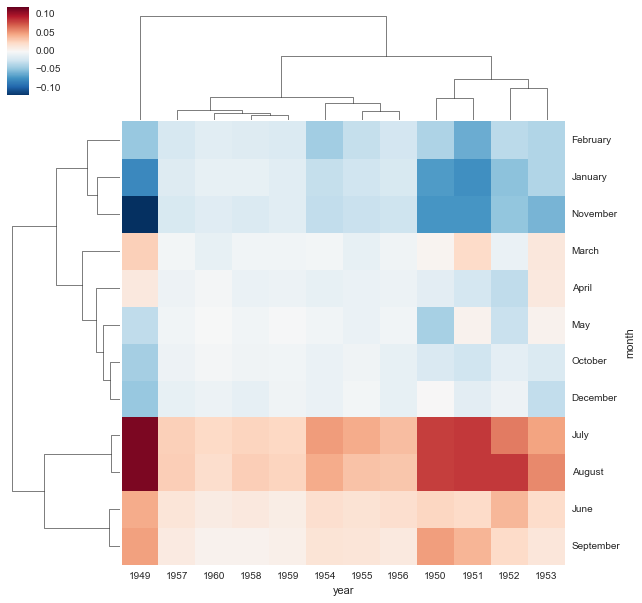

In [26]:
# z scored
sns.clustermap(flight_dframe,z_score=1)